In [19]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV
from sklearn.preprocessing import PolynomialFeatures
%matplotlib inline

# attempt 1
could not get it to work, it was that i was missing '()' when setting the linear regression
also, date does not seem to work without changing datatype. did not want to erase work.

In [47]:
prelimdf = pd.read_csv('Data/prelimdf.csv')

In [48]:
prelimdf.shape

(5528, 8)

In [49]:
prelimdf.head(1)

,Unnamed: 0,title,num_reviews,release_date,been_sale,orig_price,num_tags,num_genres
0,0,Sea of Thieves,111078,2020-06-03,1,39.99,20.0,2.0


In [50]:
prelimdf.drop(columns=['Unnamed: 0'],inplace=True)

In [51]:
prelimdf.head(1)

,title,num_reviews,release_date,been_sale,orig_price,num_tags,num_genres
0,Sea of Thieves,111078,2020-06-03,1,39.99,20.0,2.0


In [9]:
# prelim df contains all games with number of reviews, and only numeric columns
# that had no null columns (so excluding num of languages) using this df
# using this to start to model a lr

In [52]:
lr = LinearRegression()
X = prelimdf[['release_date''been_sale','orig_price','num_tags','num_genres']]
y = prelimdf[['num_reviews']]

In [53]:
lr.fit(X, y) # unsure why tis is saying missing 'y'

ValueError: could not convert string to float: '2020-06-03'

In [55]:
y

,num_reviews
0,111078
1,11813
2,216651
3,45704
4,256136
...,...
5523,155
5524,960
5525,56
5526,65


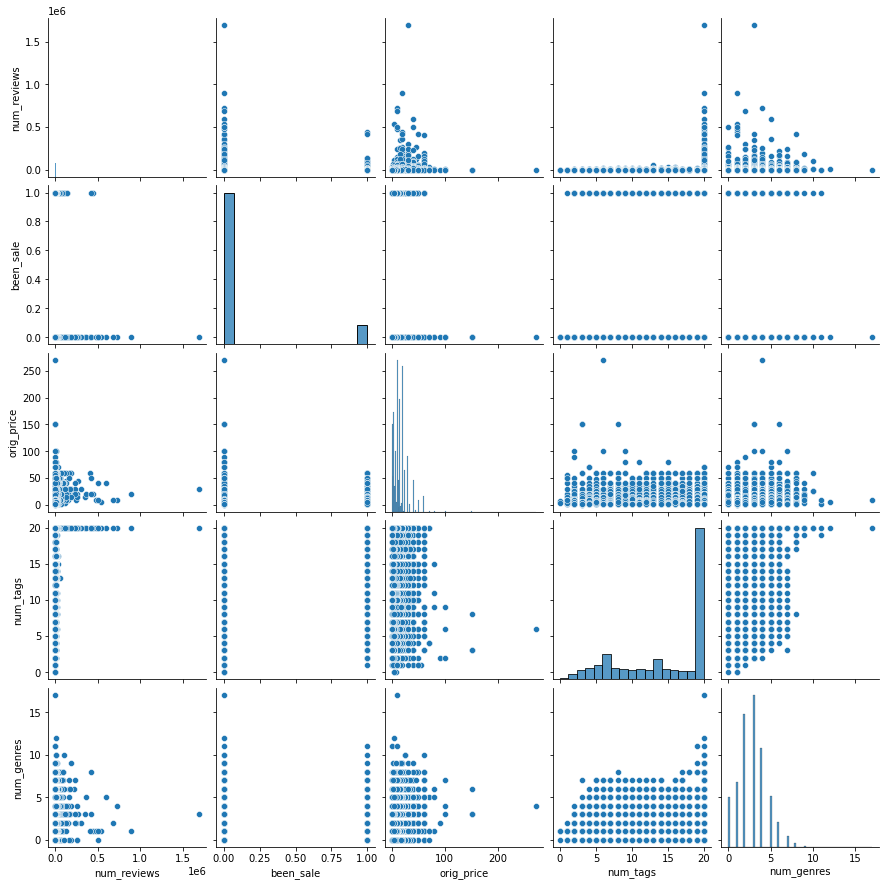

In [56]:
sns.pairplot(prelimdf)

In [21]:
lr.fit(prelimdf[['release_date','been_sale','orig_price','num_tags','num_genres']], prelimdf['num_reviews'])

TypeError: fit() missing 1 required positional argument: 'y'

In [22]:
#WHYYY

In [23]:
prelimdf.head(1)

,title,num_reviews,release_date,been_sale,orig_price,num_tags,num_genres
0,Sea of Thieves,111078,2020-06-03,1,39.99,20.0,2.0


In [24]:
numbersdf = prelimdf[['num_reviews','release_date','been_sale','orig_price','num_tags','num_genres']]

<AxesSubplot:>

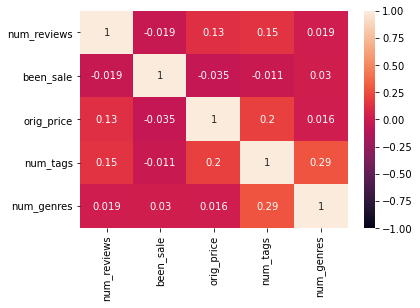

In [26]:
sns.heatmap(numbersdf.corr(),vmin = -1, vmax = 1, annot=True)

In [41]:
features, target = ['been_sale','orig_price','num_tags','num_genres'], ['num_reviews']

In [42]:
X, y = numbersdf[features], numbersdf[target]

In [43]:
lr.fit(X,y)

LinearRegression()

In [45]:
lr.score

<bound method RegressorMixin.score of LinearRegression()>

In [35]:
numbersdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5528 entries, 0 to 5527
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   num_reviews   5528 non-null   int64  
 1   release_date  5526 non-null   object 
 2   been_sale     5528 non-null   int64  
 3   orig_price    5528 non-null   float64
 4   num_tags      5528 non-null   float64
 5   num_genres    5528 non-null   float64
dtypes: float64(3), int64(2), object(1)
memory usage: 259.2+ KB


# attempt 2 - sklearn
figured out (thanks to joan) i was missing parentheses on LinearRegression.
also, date is not working for datatype. without erasing work , starting over without date

may have to change date to just the year, and have it set as year released. but for now..

In [57]:
numbersdf.head()

,num_reviews,release_date,been_sale,orig_price,num_tags,num_genres
0,111078,2020-06-03,1,39.99,20.0,2.0
1,11813,2021-03-26,0,39.99,20.0,3.0
2,216651,2021-02-02,0,19.99,20.0,6.0
3,45704,2020-08-07,1,49.99,20.0,3.0
4,256136,2020-09-18,0,13.99,20.0,0.0


In [59]:
numbersdf.drop(columns=['release_date'],inplace=True)

/usr/local/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [60]:
numbersdf

,num_reviews,been_sale,orig_price,num_tags,num_genres
0,111078,1,39.99,20.0,2.0
1,11813,0,39.99,20.0,3.0
2,216651,0,19.99,20.0,6.0
3,45704,1,49.99,20.0,3.0
4,256136,0,13.99,20.0,0.0
...,...,...,...,...,...
5523,155,1,4.99,5.0,2.0
5524,960,0,4.99,16.0,5.0
5525,56,0,0.99,3.0,3.0
5526,65,0,0.99,2.0,2.0


In [66]:
lr = LinearRegression()
X = numbersdf.iloc[:,1:]
y = numbersdf.iloc[:,0]

In [83]:
model = lr.fit(X,y)

<AxesSubplot:>

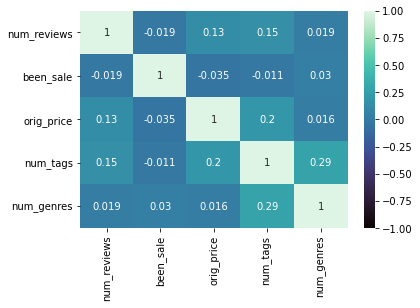

In [80]:
sns.heatmap(numbersdf.corr(), vmin = -1, vmax = 1, annot = True, cmap='mako')

In [91]:
print(model.score(X,y))  # appears initial score without limited features and no engineering has a .03 r squared.
print(model.coef_)
print(model.intercept_)


0.0328302298223444
[-1668.08354042   312.50037055   859.3763758   -477.32347604]
-8474.274915866785


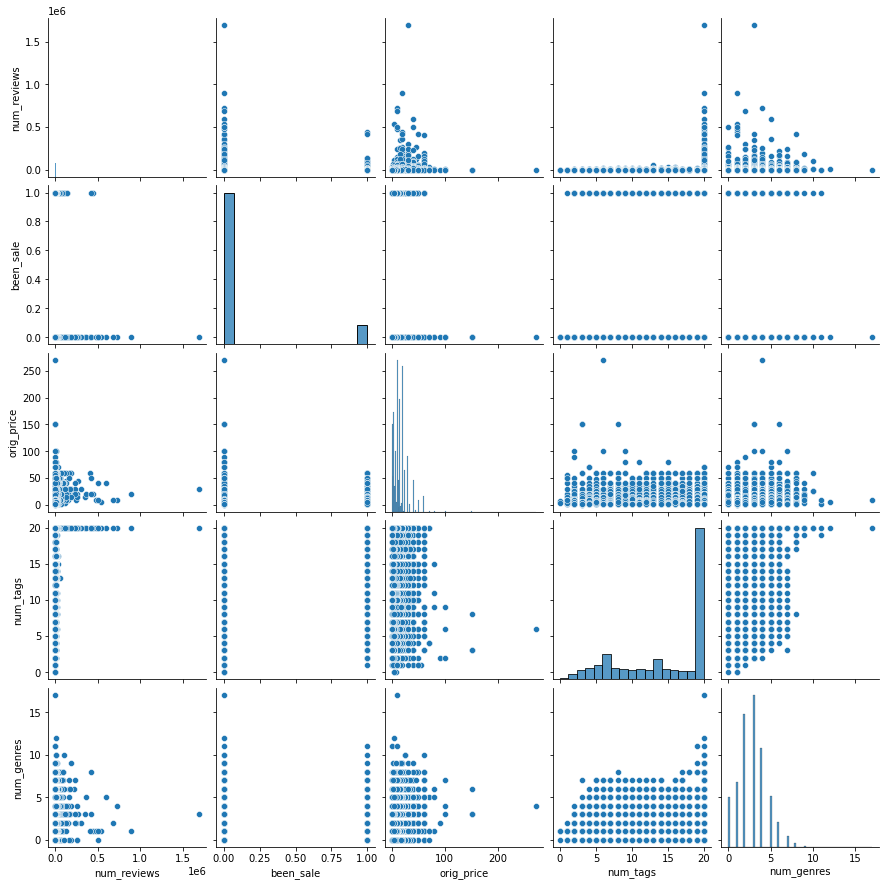

In [82]:
sns.pairplot(numbersdf)

# attempt 2 - statsmodels

I believe I got the model set up properly with sklearn, unfortunately there is little to no 
correlations with my data. attempting to use statsmodels for practice and for better understanding

In [94]:
statsmodel = smf.ols('num_reviews ~ been_sale + orig_price + num_tags + num_genres', data=numbersdf)

In [95]:
statsfit = statsmodel.fit()

In [97]:
statsfit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            num_reviews   R-squared:                       0.033
Model:                            OLS   Adj. R-squared:                  0.032
Method:                 Least Squares   F-statistic:                     46.87
Date:                Tue, 13 Apr 2021   Prob (F-statistic):           8.47e-39
Time:                        14:59:02   Log-Likelihood:                -66318.
No. Observations:                5528   AIC:                         1.326e+05
Df Residuals:                    5523   BIC:                         1.327e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -8474.2749   1522.156     -5.567      0.000   -1.15e+04   -5490.250
been_sale  -1668.0835   1683.028     -0.991      0.322   -4967.481    1631.314
orig_price   312.5004     41.196      7.586      0.000     231.739     393.261
num_tags     859.3764     91.389      9.404      0.000     680.219    1038.534
num_genres  -477.3235    323.520     -1.475      0.140   -1111.551     156.904
==============================================================================
Omnibus:                    12682.930   Durbin-Watson:                   1.768
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        121929430.119
Skew:                          21.922   Prob(JB):                         0.00
Kurtosis:                     729.250   Cond. No.                         79.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# attempt 3
refitting base lr model with prelimdf2, hoping 2 more numeric columns will improve, before attacking categorical


In [108]:
prelimdf2 = pd.read_csv('Data/prelimdf2.csv')

In [109]:
prelimdf2.head(1)

,Unnamed: 0,num_reviews,orig_price,been_sale,rating_val,num_tags,num_genres,year_released
0,0,111078,39.99,1,8.0,20.0,2.0,2020.0


In [111]:
prelimdf2.drop(columns=['Unnamed: 0'],inplace=True)

In [116]:
# lr = LinearRegression()
# x = prelimdf2.iloc[:,1:]
# y = prelimdf2.iloc[:,0]
# model = lr.fit(x, y)

In [117]:
prelimdf2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5528 entries, 0 to 5527
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   num_reviews    5528 non-null   int64  
 1   orig_price     5528 non-null   float64
 2   been_sale      5528 non-null   int64  
 3   rating_val     5521 non-null   float64
 4   num_tags       5528 non-null   float64
 5   num_genres     5528 non-null   float64
 6   year_released  5526 non-null   float64
dtypes: float64(5), int64(2)
memory usage: 302.4 KB


In [119]:
prelimdf2[prelimdf2.rating_val.isna()] # apparently 7 values were missed when mapping values column.
#                                        going to model with dropping thewe values

,num_reviews,orig_price,been_sale,rating_val,num_tags,num_genres,year_released
3434,14,9.99,1,NaN,20.0,4.0,2018.0
3883,4079,9.99,1,NaN,17.0,3.0,2014.0
4118,14,19.99,0,NaN,16.0,5.0,2018.0
4474,11,9.99,0,NaN,20.0,0.0,2021.0
4767,11,9.99,0,NaN,2.0,0.0,2018.0
5214,45,4.99,1,NaN,3.0,2.0,2018.0
5405,14,0.99,0,NaN,5.0,4.0,2019.0


In [130]:
prelim = prelimdf2[prelimdf2.rating_val.isna()==False]

In [132]:
prelim = prelim[prelim.year_released.isna()==False]

In [134]:
prelim.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5519 entries, 0 to 5527
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   num_reviews    5519 non-null   int64  
 1   orig_price     5519 non-null   float64
 2   been_sale      5519 non-null   int64  
 3   rating_val     5519 non-null   float64
 4   num_tags       5519 non-null   float64
 5   num_genres     5519 non-null   float64
 6   year_released  5519 non-null   float64
dtypes: float64(5), int64(2)
memory usage: 344.9 KB


In [135]:
lr = LinearRegression()
x = prelim.iloc[:,1:]
y = prelim.iloc[:,0]
model = lr.fit(x, y)

In [137]:
print(model.score(x,y))  
print(model.coef_)
print(model.intercept_)



0.04284251759037472
[  338.49882453  -783.69492746   428.5955534    823.9929634
   -26.63616757 -1152.5971501 ]
2312166.106217483


In [ ]:
'''
WELL the model has improved with the addition of new features, however it is 
still below .1 which is abysmal. enough for today. will have to work on dummys
or possibly pulling in additional data from another source.
'''

# attempt 4
created prelimdf3 with num languages included and publisher dummies.

In [3]:
prelimdf3 = pd.read_csv('data/prelimdf3.csv')

In [4]:
prelimdf3.head()

,Unnamed: 0,num_reviews,year_released,orig_price,been_sale,rating_val,num_tags,num_genres,languages_filled,Devolver Digital,Disney,Electronic Arts,Nightdive Studios,Paradox Interactive,SEGA,Square Enix,THQ Nordic,Ubisoft,other
0,0,111078,2020.0,39.99,1,8.0,20.0,2.0,13.0,0,0,0,0,0,0,0,0,0,1
1,1,11813,2021.0,39.99,0,9.0,20.0,3.0,12.0,0,0,1,0,0,0,0,0,0,0
2,2,216651,2021.0,19.99,0,9.0,20.0,6.0,12.0,0,0,0,0,0,0,0,0,0,1
3,3,45704,2020.0,49.99,1,7.0,20.0,3.0,20.0,0,0,0,0,0,0,0,0,0,1
4,4,256136,2020.0,13.99,0,9.0,20.0,0.0,25.0,0,0,0,0,0,0,0,0,0,1


In [6]:
prelimdf3.drop(columns=['Unnamed: 0'],inplace=True)

In [15]:
X = prelimdf3.iloc[:,1:]
y = prelimdf3.iloc[:,0]

In [16]:
lr = LinearRegression()

In [17]:
lr.fit(X,y)

LinearRegression()

In [18]:
lr.score(X,y) # ok well this got a baseline of .06, so it has increased, but not by much.

0.06816305969502878

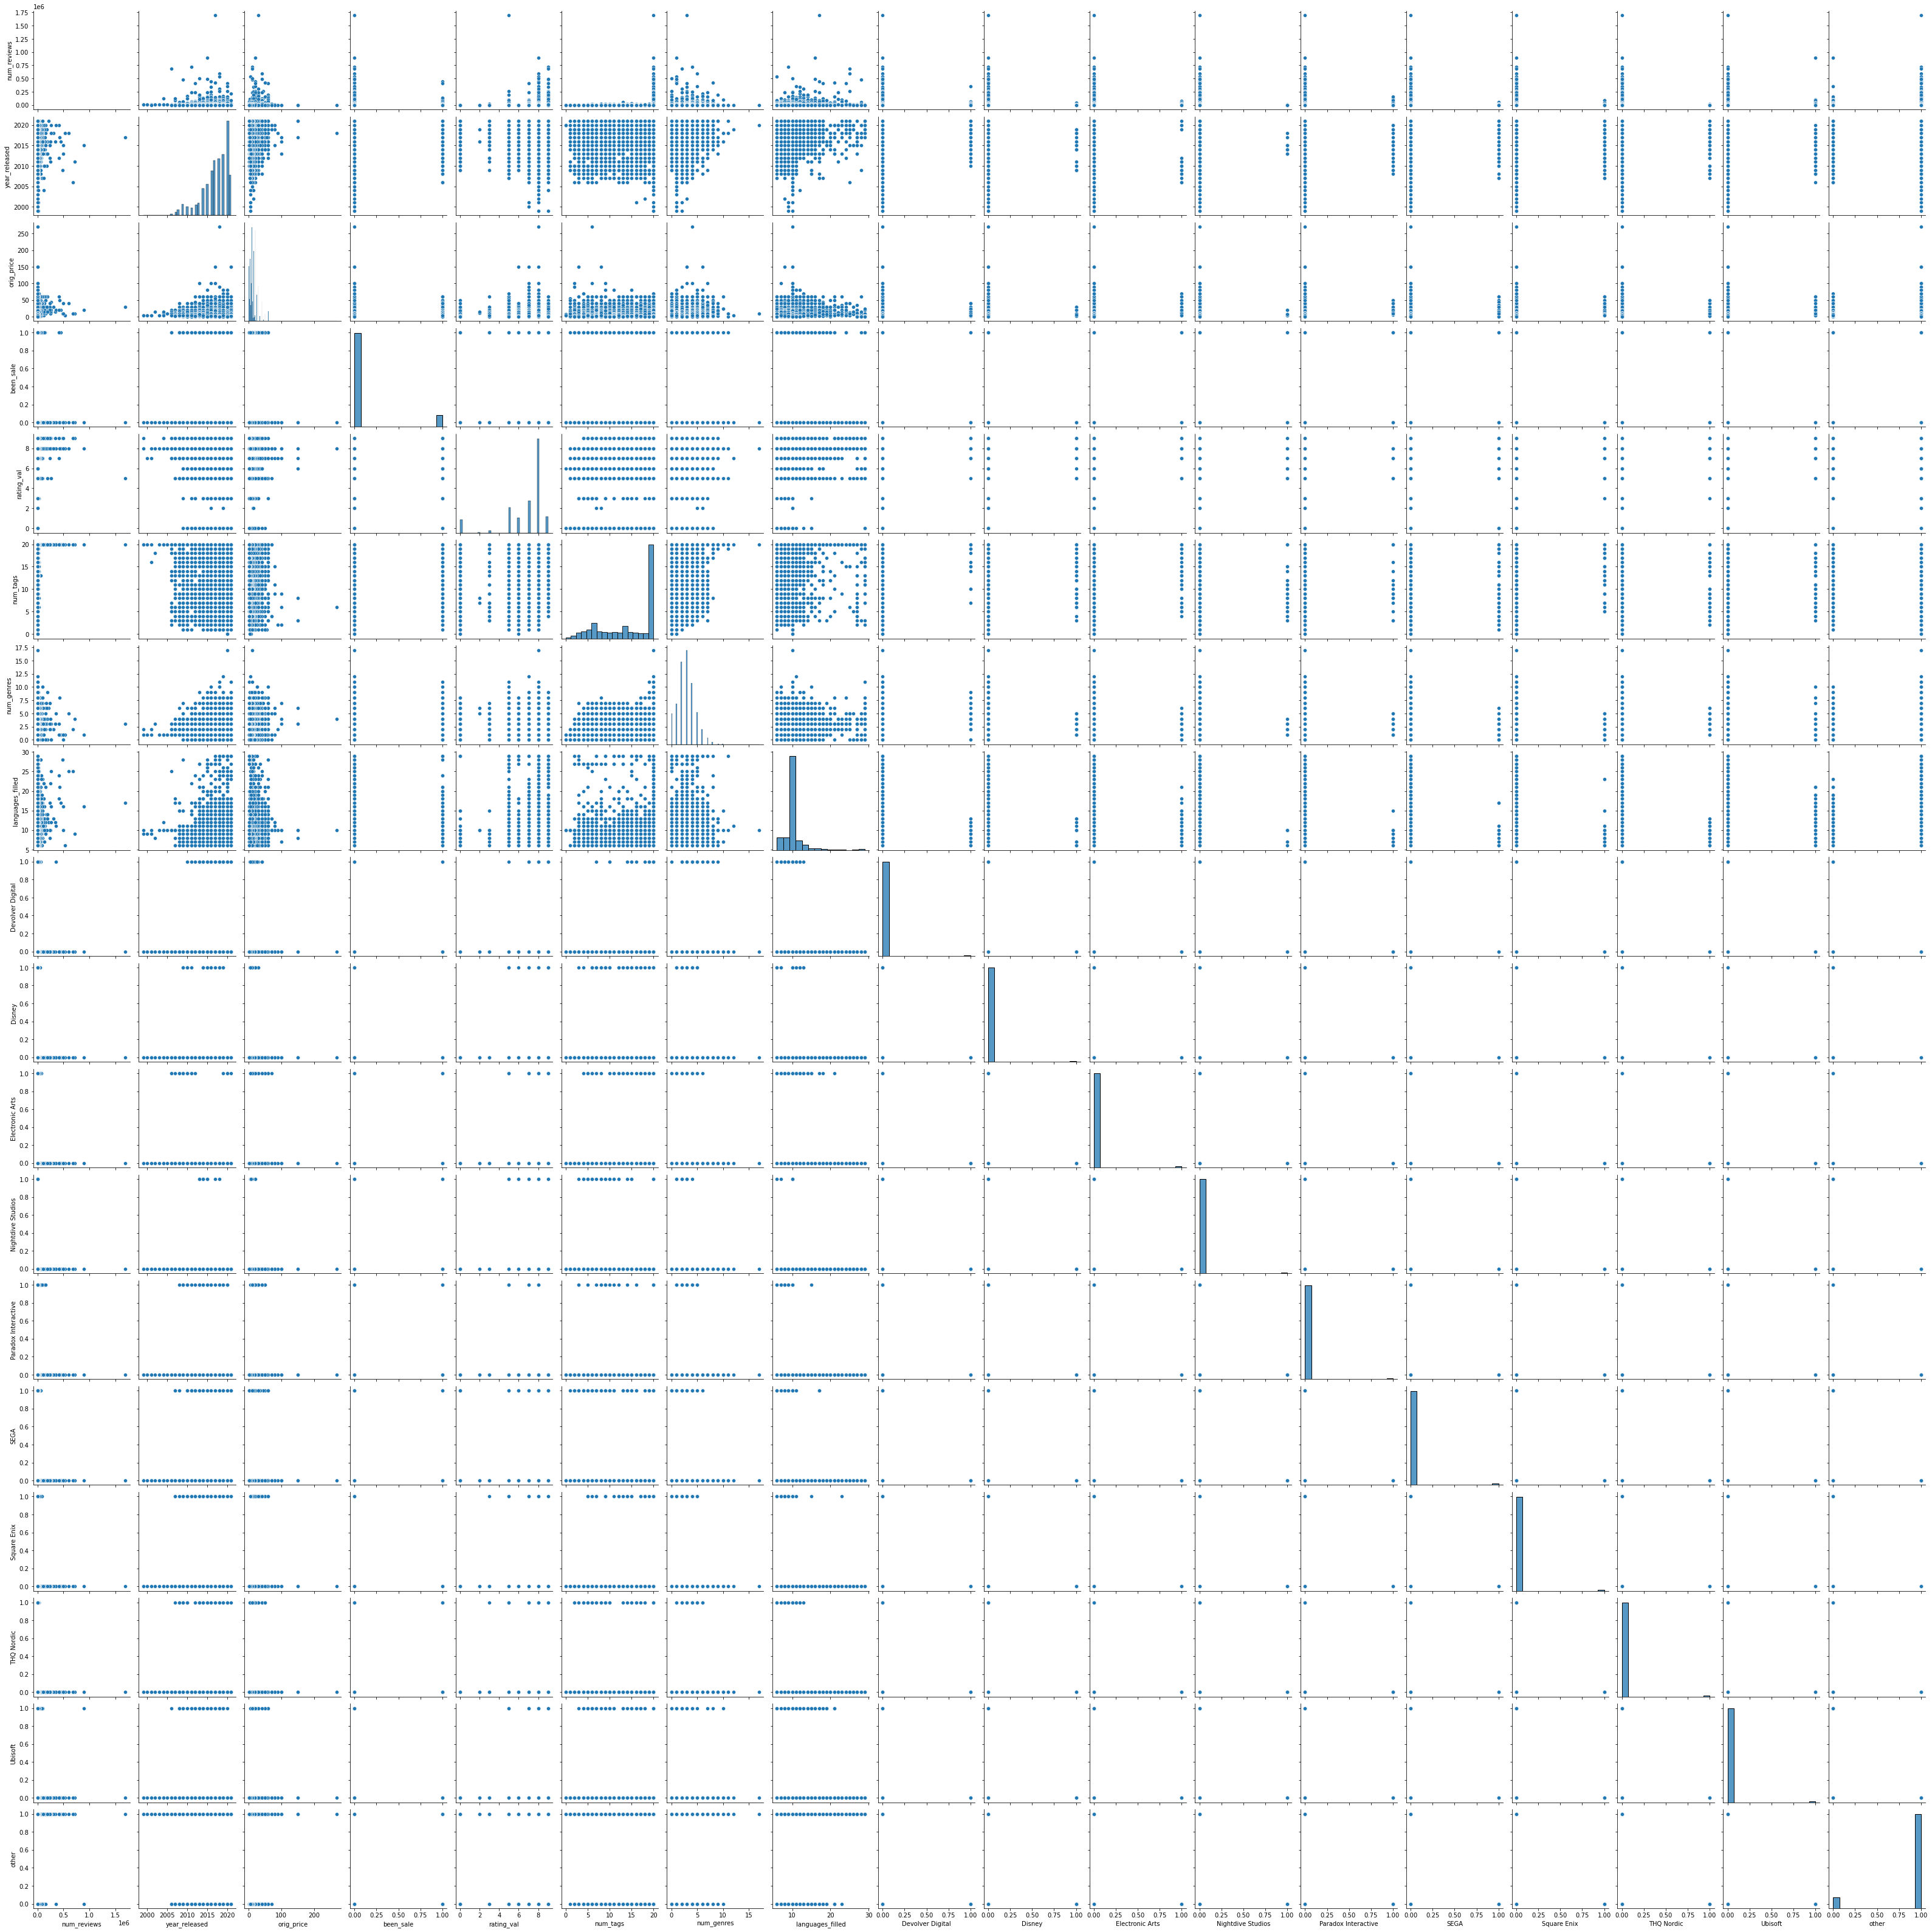

In [13]:
sns.pairplot(prelimdf3)

In [14]:
prelimdf3['year_released_log'] = np.log(prelimdf3.year_released) # including this allowed us to raise to .06!

### getting a sense of polynomials

In [20]:
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

lr_poly = LinearRegression()
lr_poly.fit(X_poly,y)
lr_poly.score(X_poly,y)

0.17571097257935464

In [21]:
poly.get_feature_names()

['1',
 'x0',
 'x1',
 'x2',
 'x3',
 'x4',
 'x5',
 'x6',
 'x7',
 'x8',
 'x9',
 'x10',
 'x11',
 'x12',
 'x13',
 'x14',
 'x15',
 'x16',
 'x17',
 'x0^2',
 'x0 x1',
 'x0 x2',
 'x0 x3',
 'x0 x4',
 'x0 x5',
 'x0 x6',
 'x0 x7',
 'x0 x8',
 'x0 x9',
 'x0 x10',
 'x0 x11',
 'x0 x12',
 'x0 x13',
 'x0 x14',
 'x0 x15',
 'x0 x16',
 'x0 x17',
 'x1^2',
 'x1 x2',
 'x1 x3',
 'x1 x4',
 'x1 x5',
 'x1 x6',
 'x1 x7',
 'x1 x8',
 'x1 x9',
 'x1 x10',
 'x1 x11',
 'x1 x12',
 'x1 x13',
 'x1 x14',
 'x1 x15',
 'x1 x16',
 'x1 x17',
 'x2^2',
 'x2 x3',
 'x2 x4',
 'x2 x5',
 'x2 x6',
 'x2 x7',
 'x2 x8',
 'x2 x9',
 'x2 x10',
 'x2 x11',
 'x2 x12',
 'x2 x13',
 'x2 x14',
 'x2 x15',
 'x2 x16',
 'x2 x17',
 'x3^2',
 'x3 x4',
 'x3 x5',
 'x3 x6',
 'x3 x7',
 'x3 x8',
 'x3 x9',
 'x3 x10',
 'x3 x11',
 'x3 x12',
 'x3 x13',
 'x3 x14',
 'x3 x15',
 'x3 x16',
 'x3 x17',
 'x4^2',
 'x4 x5',
 'x4 x6',
 'x4 x7',
 'x4 x8',
 'x4 x9',
 'x4 x10',
 'x4 x11',
 'x4 x12',
 'x4 x13',
 'x4 x14',
 'x4 x15',
 'x4 x16',
 'x4 x17',
 'x5^2',
 'x5 x6',
 'x5 x

In [22]:
prelimdf3.head()

,num_reviews,year_released,orig_price,been_sale,rating_val,num_tags,num_genres,languages_filled,Devolver Digital,Disney,Electronic Arts,Nightdive Studios,Paradox Interactive,SEGA,Square Enix,THQ Nordic,Ubisoft,other,year_released_log
0,111078,2020.0,39.99,1,8.0,20.0,2.0,13.0,0,0,0,0,0,0,0,0,0,1,7.610853
1,11813,2021.0,39.99,0,9.0,20.0,3.0,12.0,0,0,1,0,0,0,0,0,0,0,7.611348
2,216651,2021.0,19.99,0,9.0,20.0,6.0,12.0,0,0,0,0,0,0,0,0,0,1,7.611348
3,45704,2020.0,49.99,1,7.0,20.0,3.0,20.0,0,0,0,0,0,0,0,0,0,1,7.610853
4,256136,2020.0,13.99,0,9.0,20.0,0.0,25.0,0,0,0,0,0,0,0,0,0,1,7.610853
